In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"D:\JAIMIN\Data Science\Machine Learning\magic+gamma+telescope\magic04.data", header=None)

In [3]:
df.columns=['fLength', 'fWidth', 'fSize','fConc', 'fCon1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [4]:
df

fLength    fWidth   fSize   fConc   fCon1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [5]:
df.head()

fLength    fWidth   fSize   fConc   fCon1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
df.shape

(19020, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fCon1     19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fCon1       0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [9]:
df.duplicated().sum()

115

In [10]:
df.drop_duplicates(subset=None, keep='first',inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

fLength        fWidth         fSize         fConc         fCon1  \
count  18905.000000  18905.000000  18905.000000  18905.000000  18905.000000   
mean      53.161416     22.145872      2.824643      0.380247      0.214560   
std       42.259789     18.300664      0.472377      0.182709      0.110384   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.359700     11.874200      2.477100      0.235800      0.128500   
50%       37.129500     17.143800      2.740000      0.354000      0.196400   
75%       69.975400     24.712400      3.101100      0.503500      0.285000   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  18905.000000  18905.000000  18905.000000  18905.000000  18905.000000  
mean      -4.177867     10.618826      0.259364     27.551644    193.712554  
std       59.010059     50.900687     20.775268     26.083055     74.685712  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.479100    -12.769300    -10.835800      5.516400    142.269000  
50%        4.062900     15.338000      0.750000     17.533000    191.832000  
75%       24.133500     35.869400     10.948900     45.704000    240.409000  
max      575.240700    238.321000    179.851000     90.000000    495.561000

In [13]:
df['class'].value_counts()

class
g    12332
h     6573
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

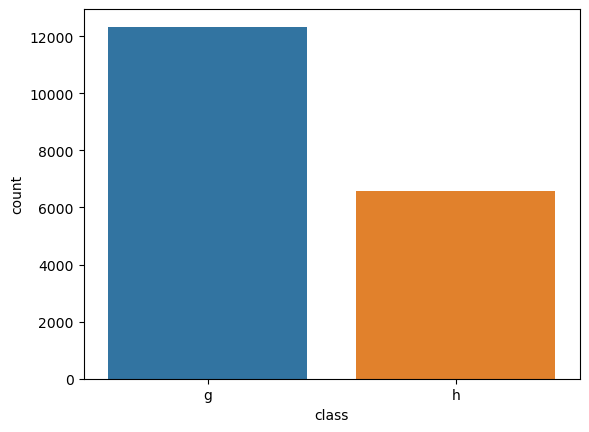

In [14]:
sns.countplot(x="class", data = df)

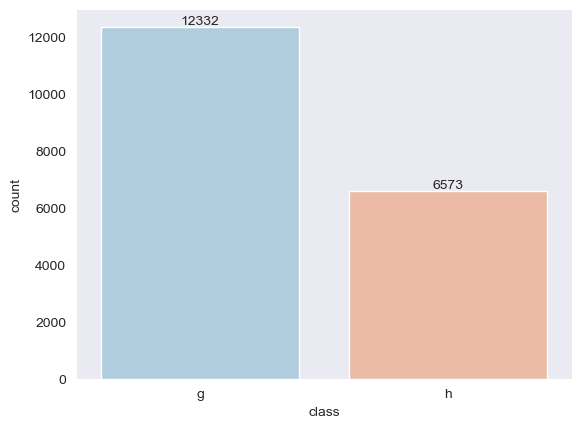

In [15]:
sns.set_style('dark') 
ax = sns.countplot(x = 'class', data=df, palette = 'RdBu_r')
for bars in ax.containers: 
    ax.bar_label(bars)

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


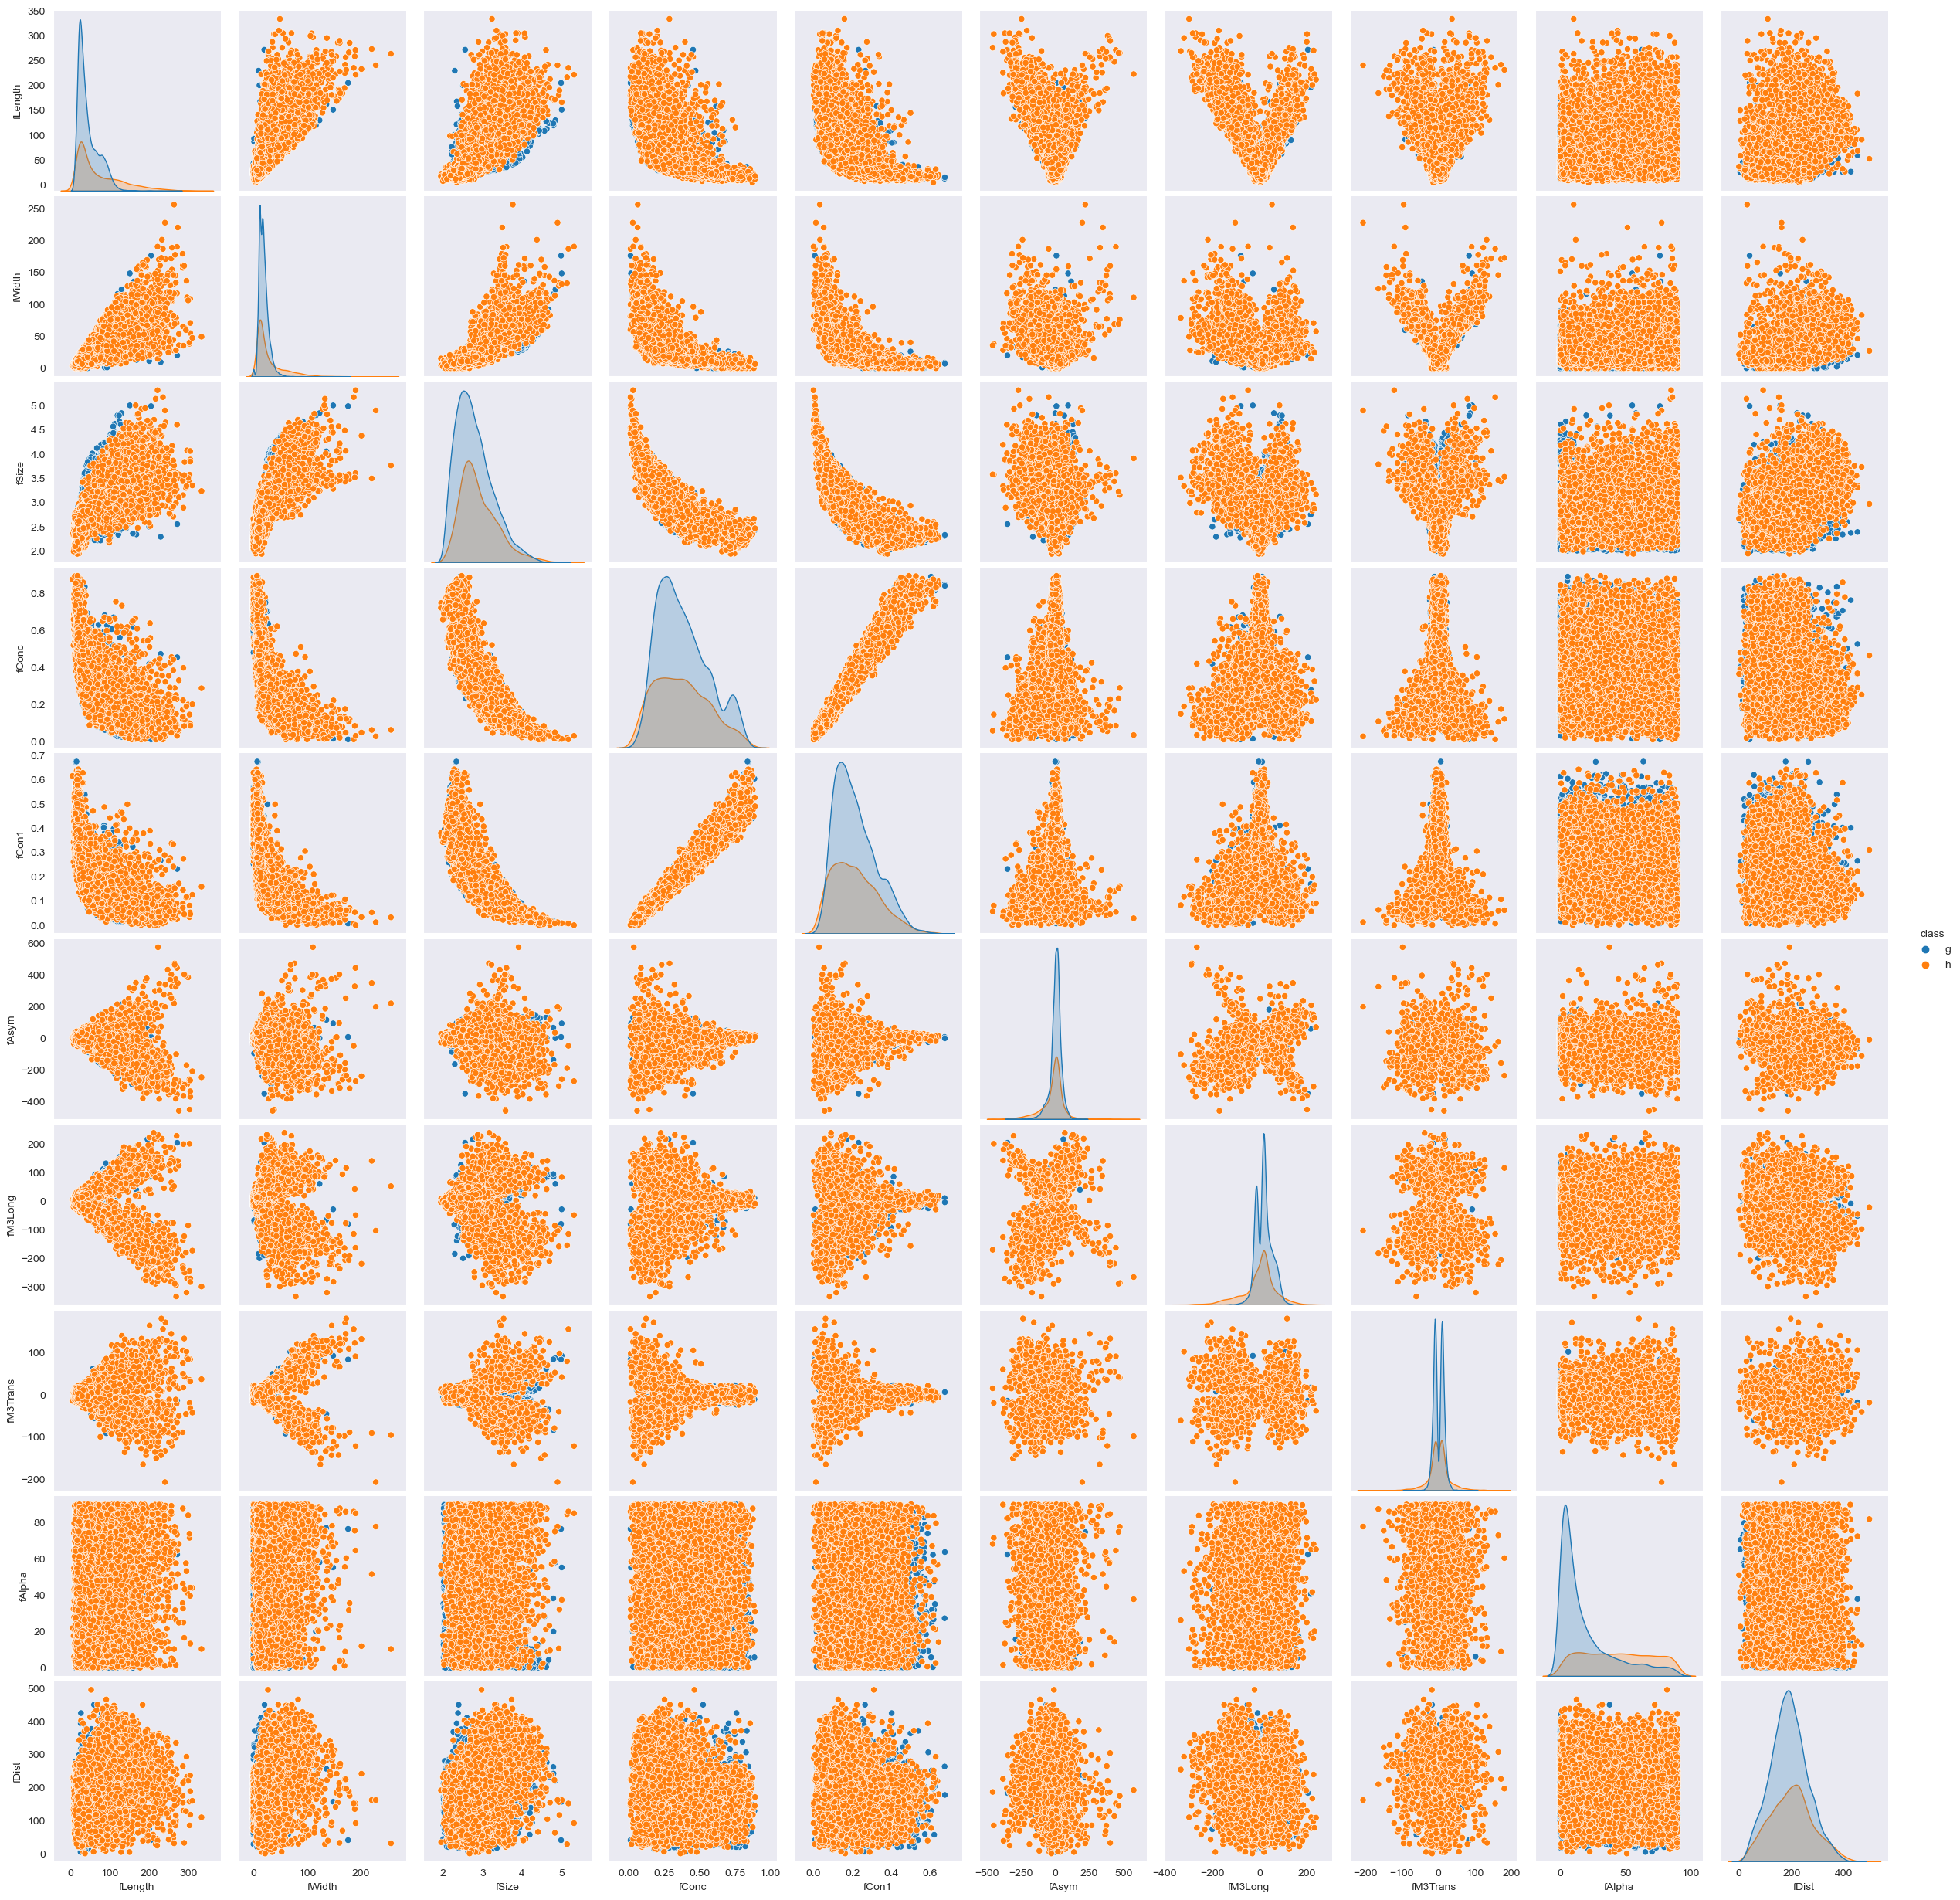

In [16]:
sns.pairplot(df, hue = 'class')

In [17]:
x=df.drop(["class"],axis=1)
print(x)
y=df["class"]
print(y)

        fLength    fWidth   fSize   fConc   fCon1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  
0       -8.2027  40.0920   81.8828  
1       -9.9574   6.3609  205.2610  
2      -45.2

In [18]:
scaler = StandardScaler()

In [19]:
x_scaled = scaler.fit_transform(x)

In [20]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [21]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [22]:
naive_bayes.score(x_test,y_test)

0.7235543018335684

In [23]:
naive_bayes.score(x_train,y_train)

0.7305221793999849

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(x_train,y_train)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

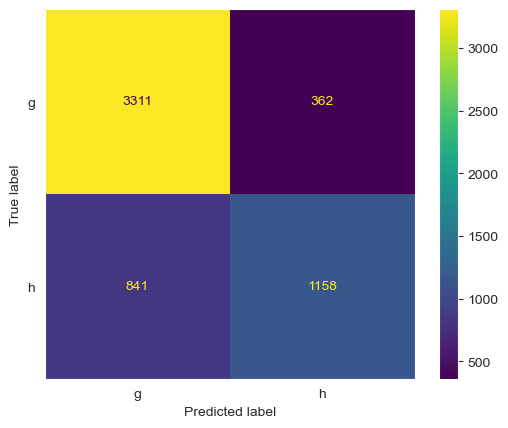

In [36]:
ConfusionMatrixDisplay.from_estimator(regression, x_test, y_test)

In [37]:
y_pred = regression.predict(x_test)
y_pred

array(['h', 'g', 'g', ..., 'g', 'g', 'g'], dtype=object)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.80      0.90      0.85      3673
           h       0.76      0.58      0.66      1999

    accuracy                           0.79      5672
   macro avg       0.78      0.74      0.75      5672
weighted avg       0.78      0.79      0.78      5672



In [40]:
from sklearn.metrics import RocCurveDisplay

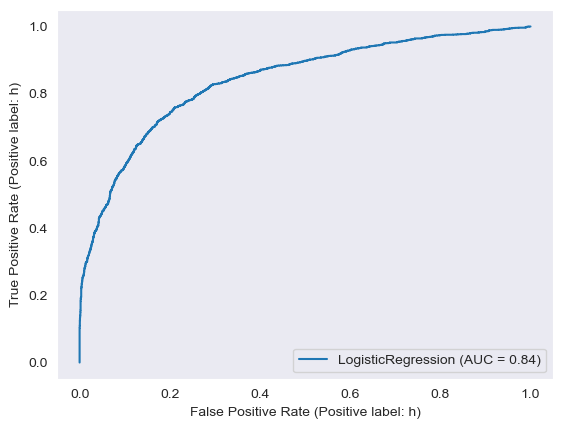

In [41]:
RocCurveDisplay.from_estimator(regression,x_test,y_test)

In [42]:
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier

In [43]:
ovr = OneVsRestClassifier(regression)

In [44]:
ovr.fit(x_train, y_train)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OneVsRestClassifier(estimator=LogisticRegression())

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 10000)

In [47]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [48]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [50]:
scaled_x_train = scaler.fit_transform(x_train)

In [51]:
scaled_x_test = scaler.transform(x_test)

In [52]:
scaled_x_test

array([[-0.77458553, -0.69445184, -1.23900856, ..., -0.51385574,
         1.38199271, -0.83872   ],
       [-0.92240681, -0.70664212, -0.69700364, ...,  0.41859615,
         0.34861275, -1.71877914],
       [ 0.86298167,  0.4847293 ,  0.83484117, ..., -1.19425621,
        -0.69384427,  0.34641505],
       ...,
       [-0.96055285, -0.67597774, -0.66976615, ...,  0.74266777,
        -0.97454419,  0.73100048],
       [ 0.4484512 , -0.32183073,  0.06015632, ...,  0.48840595,
         0.00218453,  0.97694812],
       [-0.5271477 , -0.20279914,  0.12075445, ...,  0.55698082,
         0.48815909, -0.38617131]])

In [53]:
grid_model.fit(scaled_x_train, y_train)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_

GridSearchCV(estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [54]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.5263157894736842, 'penalty': 'elasticnet'}

In [55]:
y_pred = grid_model.predict(scaled_x_test)
y_pred

array(['h', 'g', 'g', ..., 'g', 'g', 'g'], dtype=object)

In [56]:
accuracy_score(y_test, y_pred)

0.7924894217207334

In [57]:
confusion_matrix(y_test, y_pred)

array([[3325,  348],
       [ 829, 1170]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           g       0.80      0.91      0.85      3673
           h       0.77      0.59      0.67      1999

    accuracy                           0.79      5672
   macro avg       0.79      0.75      0.76      5672
weighted avg       0.79      0.79      0.78      5672

